In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path_to_csv = os.path.join("..", "data", "country_medals.csv")

medal_winners = pd.read_csv(path_to_csv)

In [5]:
medal_winners.head()

,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC_Year_Event_Medal,region
0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN1900Tug-Of-War Men's Tug-Of-WarGold,Denmark
1,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,FIN1920Swimming Men's 200 metres BreaststrokeB...,Finland
2,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,FIN1920Swimming Men's 400 metres BreaststrokeB...,Finland
3,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,FIN2014Ice Hockey Men's Ice HockeyBronze,Finland
4,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,FIN1948Gymnastics Men's Individual All-AroundB...,Finland


In [24]:
country_year = medal_winners.groupby(["region", "Season", "Year"])
country_year_records = country_year["Medal"].count()
country_year_records.head(20)

region       Season  Year
Afghanistan  Summer  2008    1
                     2012    1
Algeria      Summer  1984    2
                     1992    2
                     1996    3
                     2000    5
                     2008    2
                     2012    1
                     2016    2
Argentina    Summer  1924    6
                     1928    7
                     1932    4
                     1936    7
                     1948    7
                     1952    5
                     1956    2
                     1960    2
                     1964    1
                     1968    2
                     1972    1
Name: Medal, dtype: int64

In [19]:
type(country_year_records)

pandas.core.series.Series

In [29]:
country_year_records["USA"]["Summer"]

Year
1896     19
1900     54
1904    230
1906     23
1908     46
1912     63
1920     95
1924     99
1928     56
1932    110
1936     57
1948     84
1952     76
1956     74
1960     71
1964     90
1968    107
1972     94
1976     94
1984    173
1988     94
1992    108
1996    101
2000     91
2004    101
2008    110
2012    103
2016    121
Name: Medal, dtype: int64

Enter Country to analyze: USA
Enter Another country to analyze: Russia
Enter a Season (Summer/Winter): Summer


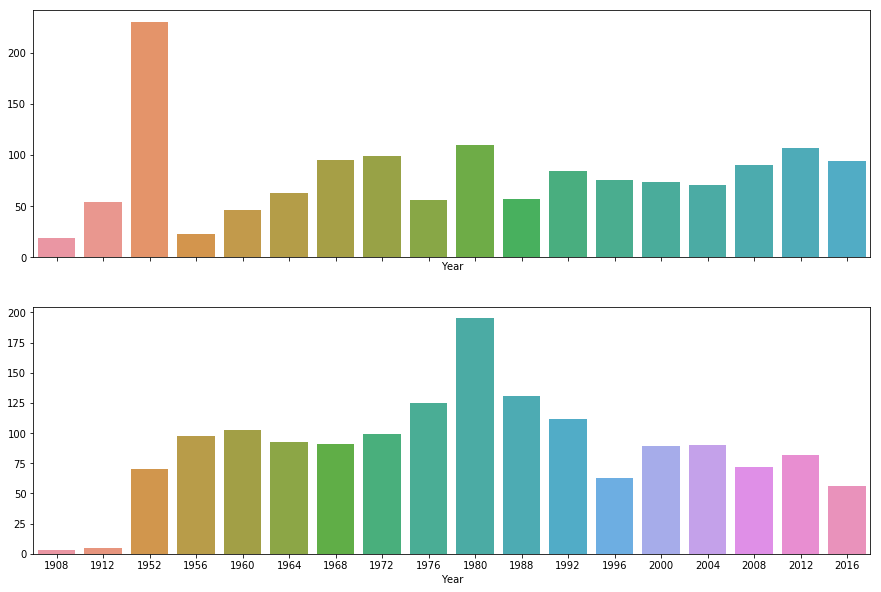

In [40]:
country_input = input("Enter Country to analyze: ")
country_input2 = input("Enter Another country to analyze: ")

season_input = input("Enter a Season (Summer/Winter): ")


# Figure for bar chart
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,10), sharex=True)

sns.barplot(
    x=country_year_records[country_input][season_input].index,
    y=country_year_records[country_input][season_input].values,
    ax=ax1
)

sns.barplot(
    x=country_year_records[country_input2][season_input2].index,
    y=country_year_records[country_input2][season_input2].values,
    ax=ax2
)


## Need a way to display 0 when a country did not participate:

In [60]:
summer_winners = medal_winners.loc[medal_winners["Season"] == "Summer"]
summer_year_list = summer_winners["Year"].unique()
summer_year_list = np.sort(summer_year_list)

In [61]:
winter_winners = medal_winners.loc[medal_winners["Season"] == "Winter"]
winter_year_list = winter_winners["Year"].unique()
winter_year_list = np.sort(winter_year_list)

Enter Country to analyze: UK
Enter Another country to analyze: Russia
Enter a Season (Summer/Winter): Summer


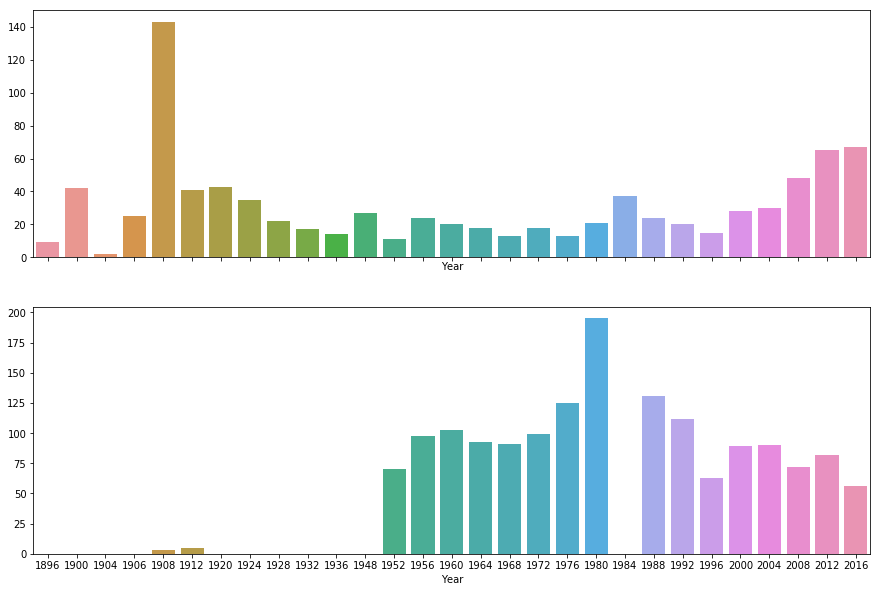

In [66]:
country_input = input("Enter Country to analyze: ")
country_input2 = input("Enter Another country to analyze: ")

season_input = input("Enter a Season (Summer/Winter): ")
if season_input == "Summer":
    order_input = summer_year_list
elif season_input == "Winter":
    order_input = winter_year_list
else:
    print("Try again")


# Figure for bar chart
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,10), sharex=True)

sns.barplot(
    x=country_year_records[country_input][season_input].index,
    y=country_year_records[country_input][season_input].values,
    order=order_input,
    ax=ax1
)

sns.barplot(
    x=country_year_records[country_input2][season_input2].index,
    y=country_year_records[country_input2][season_input2].values,
    order=order_input,
    ax=ax2
)
